## 1 ##

In [9]:
# Importing all the necessary
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Listing Dr.X function to get sequences
def get_sequences_from_file(fasta_fn):
    # Creating an empty dictionary
    sequence_data_dict = {}
    # Looping through record (sequence) using the Biopython parser for fasta input sequence 
    for record in SeqIO.parse(fasta_fn, "fasta"):
        # Splitting the description with no delimiter 
        description = record.description.split()
        # Adding space in between the split and storing it in species_name 
        species_name = description[1] + " " + description[2]
        # Storing species name as key and record.seq as value in dictinary (sequence_data_dict)
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

## 2 ##

In [4]:
# Listing function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion
def translate_function(string_nucleotides):
    # Defining empty string variables
    seek = ""
    aa_seq_string = ""
    # Getting codon table using CondonTable function from Biopython library
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    # Looping through string every third charcter in string_nucleotides 
    for x in range(len(string_nucleotides)):
        seek += str(string_nucleotides[x])
        if (x+1) % 3 == 0:
            # Check if every third charcter is a stop codon
            if seek in mito_table.stop_codons:
                break
            # If not stop codon then translate the nucleotide to amino acids    
            aa_seq_string += mito_table.forward_table[seek]
            seek = ""
    return(aa_seq_string)

## 3 ##

In [5]:
# Alternative function that translates nucleotids to amino acids
def DNA_translate_biopython(Input_seq):
    # Using Input
    output_seq = Input_seq.translate()
    return output_seq

## 4 ##

In [6]:
# Function that calculates the molecular weight of each amino acid sequence
def Mol_wt_aa(aa_seq):
    # Defining an empty list
    analyzed_seq = []
    # Looping through amino acid sequence
    for list_item in aa_seq:
        # Using Protein Analysis and molecular weight function from ProtParam library from biopython
        analyzed_seq.append(ProteinAnalysis(list_item).molecular_weight())
    return analyzed_seq

## 5 ##

In [7]:
# Function to analyze GC content
def GC_content(Input_seq):
    # Using Bio.SeqUtils library from biopython
    output_seq = GC(Input_seq)
    return output_seq

#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

In [10]:
# Parsing fasta sequence
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
# Reading csv file as dataframe using pandas
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
# Storing species column as a list
species_list = list(penguins_df.species)

## 6 ##

In [11]:
# Creating new columns molecular_weight and GC_content in the datafarme and setting the values of those colmumns to 'NaN'
penguins_df['molecular_weight'] = 'NaN'
penguins_df['GC_content'] = 'NaN'

## 7 ##

In [12]:
# Defining empty lists
aa_seq = []
GC_list = []
# Looping over each sequence to get the translated sequence and to get molecular weight and GC content of amino acids
for key, value in cytb_seqs.items():
    # Using functions to append to empty lists
    aa_seq.append(translate_function(value))
    GC_list.append(GC_content(value))
# Appendng values of Molecular weight and GC content of amino acids to respective columns of the dataframe
penguins_df['molecular_weight'] = Mol_wt_aa(aa_seq)
penguins_df['GC_content'] = GC_list

## 8 ##

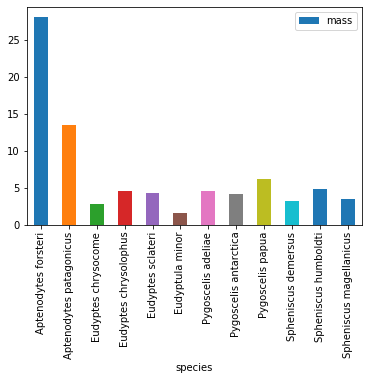

In [13]:
# Plotting a bar-chart of the mass with the x-axes labeled with species names
penguins_df.plot(kind='bar', x='species', y='mass')
plt.show()

## *Q1* What is the smallest penguin species? 
### Eudyptula minor
## *Q2* What else is interesting about this species?
### Average lifespan of this species is 6.5 years

## 9 ##

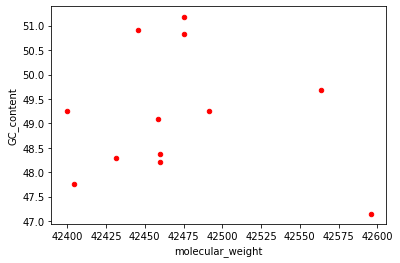

In [14]:
# Plotting a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).
penguins_df.plot(kind='scatter', x='molecular_weight', y='GC_content', linestyle='-', color='red')
plt.show()

## 10 ##

In [21]:
# Saving the new DataFrame to a file called "penguins_mass_cytb.csv"
penguins_df.to_csv('penguins_mass_cytb.csv')